<a href="https://colab.research.google.com/github/taketaka-MU/hs-2023/blob/main/20230810/homerun_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **大谷選手のホームランデータから軌道を計算しよう**

参考サイト
* https://web3.hide.ac/articles/dtF3OzR8y
* https://baseballsavant.mlb.com/statcast_leaderboard


ボールの軌道

初期速度：$(u_0,v_0)=(V_0  \cos \theta, V_0  \sin \theta)$

位置：$(x(t),y(t))=(u_0 t, v_0 t - \frac{1}{2}t^2)$

第39号

日時：2023-07-28

ピッチャー：Gausman, Kevin

打球角度：28°

打球初速：46.3(m/s) = 時速167Km

到達距離：128m

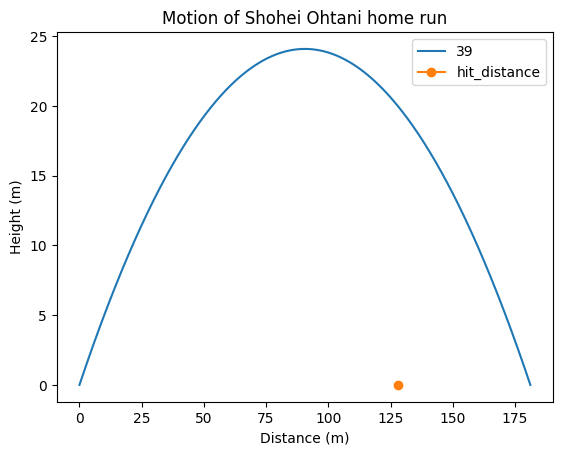

In [7]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.radians(28.0) # 角度 (radian)
speed = 46.3 # 初速 (m/s)
hit_distance = 128 # 到達距離 (m)
g = 9.81  # 重力加速度 m/s^2
t_flight = 2 * speed * np.sin(angle) / g # 滞空時間
t = np.linspace(0, t_flight, num=1000)
x = speed * np.cos(angle) * t
y = speed * np.sin(angle) * t - 0.5 * g * t ** 2
plt.plot(x, y,label="39")
plt.plot(hit_distance, 0,marker='o', label="hit_distance")
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home run')
plt.legend()
plt.show()

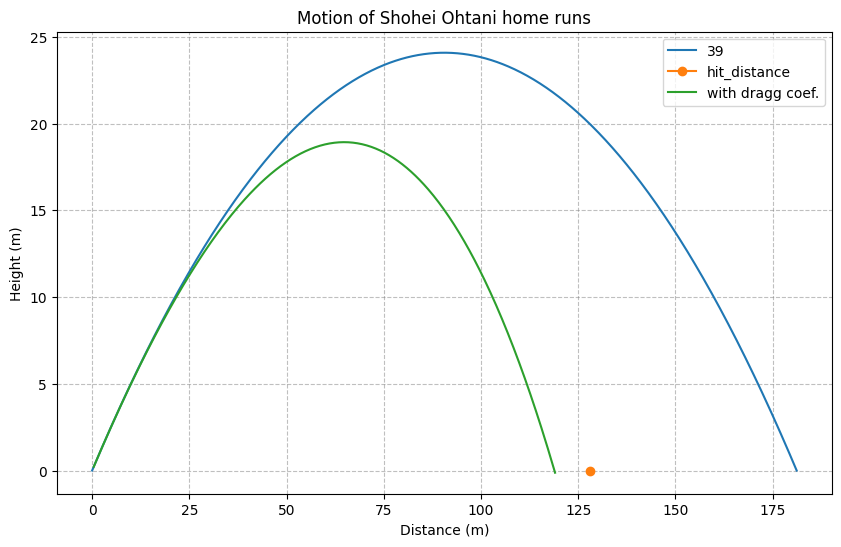

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calc(launch_speed, launch_angle, k): # with air resistance
    #launch_angle = np.radians(launch_angle)  # Convert degrees to radians
    g = 9.81  # Gravity acceleration in m/s^2
    t_flight = 2 * launch_speed * np.sin(launch_angle) / g
    t = np.linspace(0, t_flight, num=1000)
    ux = launch_speed * np.cos(launch_angle)
    uy = launch_speed * np.sin(launch_angle)
    x, y = 0, 0
    dt=0.01
    gux,guy,gx,gy = [], [], [], []
    for i in range(1000):
      uxold,uyold,xold,yold=ux,uy,x,y
      u=np.sqrt(ux*ux+uy*uy)
      ux += (- k * u * ux)*dt
      uy += (-g -k * u * uy)*dt
      x += ux * dt
      y += uy * dt
      gux.append(ux)
      guy.append(uy)
      gx.append(x)
      gy.append(y)
      if(y < 0):
        break;

    return gux,guy,gx,gy

# 空気抵抗を入れた軌道の計算
k = 0.0045 # 空気抵抗係数
ux, uy, cx, cy = calc(speed, angle, k)

plt.figure(figsize=(10, 6))
plt.plot(x, y,label="39")
plt.plot(hit_distance, 0,marker='o', label="hit_distance")
plt.plot(cx, cy,label="with drag coef.")

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home runs')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()